In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
bankloan=pd.read_csv(r"C:\Users\Prarthana Saikia\Desktop\Praxis\Machine Learning\ML class\bankloan.csv",na_values='#NULL!')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176.0,9.3,11.36,5.01,1.0
1,27,1,10,6,31.0,17.3,1.36,4.00,0.0
2,40,1,15,14,55.0,5.5,0.86,2.17,0.0
3,41,1,15,14,120.0,2.9,2.66,0.82,0.0
4,24,2,2,0,28.0,17.3,1.79,3.06,1.0


In [3]:
#bankloan['ed'] = bankloan['ed'].astype('category')
bankloan_known = bankloan[~bankloan.default.isnull()]
bankloan_known['default'] = bankloan_known['default'].astype('int')
bankloan_unknown = bankloan[bankloan.default.isnull()]

C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [7]:
model_tree.fit(X=bankloan_known.drop('default',axis=1),y=bankloan_known['default'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

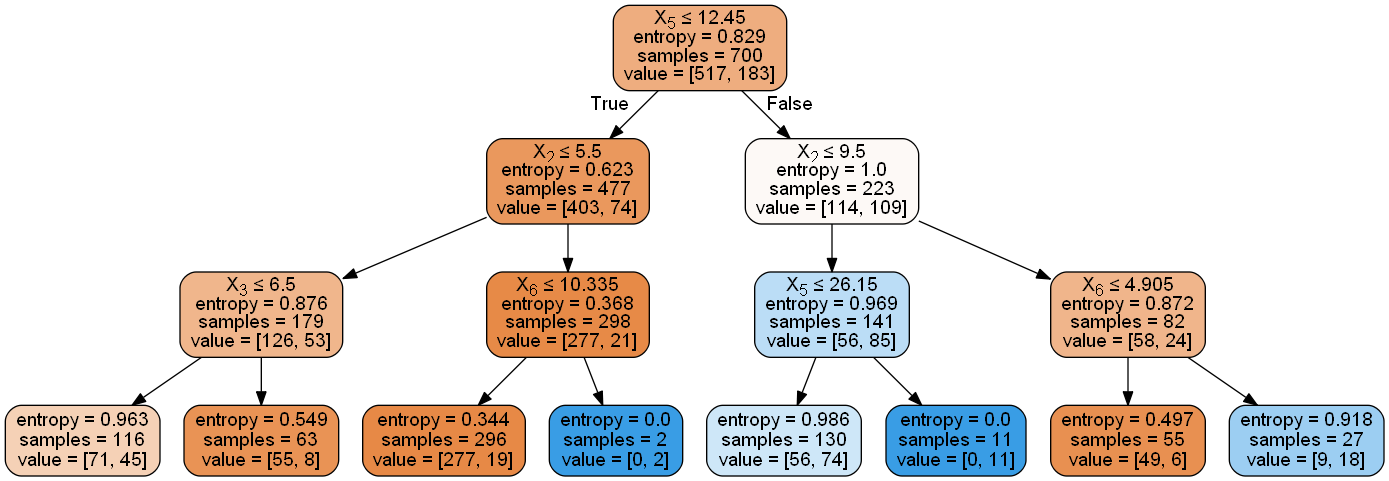

In [8]:
dot_data = StringIO()

export_graphviz(model_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#dot_data.close()

In [9]:
pred_tree_training = model_tree.predict(X = bankloan_known.drop('default',axis=1))

In [10]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
print(confusion_matrix(pred_tree_training,bankloan_known['default']))
print(cohen_kappa_score(pred_tree_training,bankloan_known['default']))
print(accuracy_score(pred_tree_training,bankloan_known['default']))

[[452  78]
 [ 65 105]]
0.458567719602
0.795714285714
